In [1]:
import numpy as np
import pandas as pd


In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from keras.datasets import imdb
(X_train, Y_train), (X_test, Y_test) = imdb.load_data(num_words=10000) 

17464789/17464789 [==============================] - 3s 0us/step


In [4]:
X_train=X_train[:4500]
X_test=X_test[:1500]
Y_train=Y_train[:4500]
Y_test=Y_test[:1500]

In [5]:
data = np.concatenate((X_train, X_test), axis=0) # axis 0 is first running vertically downwards across rows (axis 0), axis 1 is second running horizontally across columns (axis 1),
label = np.concatenate((Y_train, Y_test), axis=0)

In [6]:
data.shape

(6000,)

In [7]:
label.shape

(6000,)

In [8]:
X_train.shape


(4500,)

In [9]:
X_test.shape


(1500,)

In [10]:
Y_train.shape


(4500,)

In [11]:
Y_test.shape


(1500,)

In [12]:
print("Review is ",X_train[0]) # series of no converted word to vocabulory associated with index
print("Review is ",Y_train[0])

Review is  [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
Review is  1


In [13]:
vocab=imdb.get_word_index() # Retrieve the word index file mapping words to indices
print(vocab)


1641221/1641221 [==============================] - 1s 0us/step
{'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, 'sonja': 16816, 'vani': 63951, 'woods': 1408, 'spiders': 16115, 'hanging': 2345, 'woody': 2289, 'trawling': 52008, "hold's": 52009, 'comically': 11307, 'localized': 40830, 'disobeying': 30568, "'royale": 52010, "harpo's": 40831, 'canet': 52011, 'aileen': 19313, 'acurately': 52012, "diplomat's": 52013, 'rickman': 25242, 'arranged': 6746, 'rumbustious': 52014, 'familiarness': 52015, "spider'": 52016, 'hahahah': 68804, "wood'": 52017, 'transvestism': 40833, "hangin'": 34702, 'bringing': 2338, 'seamier': 40834, 'wooded': 34703, 'bravora': 52018, 'grueling': 16817, 'wooden': 1636, 'wednesday': 16818, "'prix": 52019, 'altagracia': 34704, 'circuitry': 52020, 'crotch': 11585, 'busybody': 57766, "tart'n'tangy": 52021, 'burgade': 14129, 'thrace': 52023, "tom's": 11038, 'snuggles': 52025, 'francesco': 29114, 'complainers': 52027, 'templarios': 52125, '272': 40835, '273': 52028, 'zani

In [14]:
Y_train

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [15]:
Y_test

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [16]:
def vectorize(sequences, dimension = 10000): # We will vectorize every review and fill it with zeros so that it contains exactly 10,000 numbers.
# Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [17]:
test_x = data[:1000]
test_y = label[:1000]
train_x = data[1000:]
train_y = label[1000:]

In [18]:
test_x.shape


(1000,)

In [19]:
test_y.shape


(1000,)

In [20]:
train_x.shape


(5000,)

In [21]:
train_y.shape

(5000,)

In [22]:
print("Categories:", np.unique(label))


Categories: [0 1]


In [23]:
print("Number of unique words:", len(np.unique(np.hstack(data))))

Number of unique words: 9992


In [24]:
length = [len(i) for i in data]
print("Average Review length:", np.mean(length))
print("Standard Deviation:", round(np.std(length)))

Average Review length: 241.46383333333333
Standard Deviation: 179


In [25]:
print("Label:", label[0])


Label: 1


In [26]:
print("Label:", label[1])


Label: 0


In [27]:
print(data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [28]:
index = imdb.get_word_index()

In [29]:
reverse_index = dict([(value, key) for (key, value) in index.items()])

In [30]:
decoded = " ".join( [reverse_index.get(i - 3, "#") for i in data[0]] )

In [31]:
print(decoded)

# this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert # is an amazing actor and now the same being director # father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for # and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also # to the two little boy's that played the # of norman and paul they were just brilliant children are often left out of the # list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [32]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

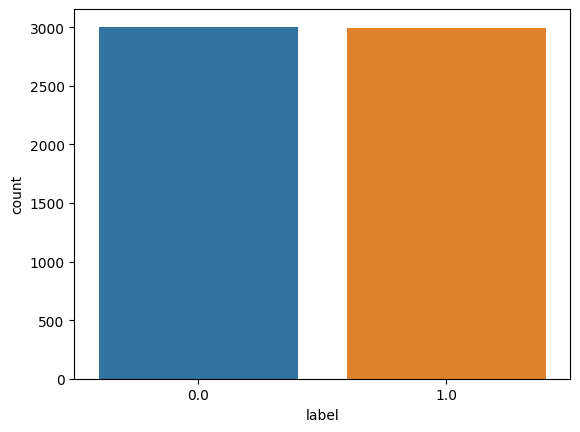

In [33]:
data = vectorize(data)
label = np.array(label).astype("float32")
labelDF=pd.DataFrame({'label':label})
sns.countplot(x='label', data=labelDF)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data,label, test_size=0.20, random_state=1)


In [35]:
X_train.shape


(4800, 10000)

In [36]:
X_test.shape


(1200, 10000)

In [37]:
from keras.utils import to_categorical
from keras import models
from keras import layers
model = models.Sequential()


In [38]:
model.add(layers.Dense(50, activation = "relu", input_shape=(10000, )))
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                500050    
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 505,201
Trainable params: 505,201
Non-trai

In [39]:
import tensorflow as tf
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [40]:
model.compile(
optimizer = "adam",
loss = "binary_crossentropy",
metrics = ["accuracy"]
)

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
results = model.fit(
X_train, Y_train,
epochs= 2,
batch_size = 500,
validation_data = (X_test, Y_test),
callbacks=[callback]
)

Epoch 1/2
10/10 [==============================] - 5s 182ms/step - loss: 0.6750 - accuracy: 0.5958 - val_loss: 0.6242 - val_accuracy: 0.7800
Epoch 2/2
10/10 [==============================] - 1s 69ms/step - loss: 0.5450 - accuracy: 0.7902 - val_loss: 0.4716 - val_accuracy: 0.8217


In [43]:
print(np.mean(results.history["val_accuracy"]))

0.8008333146572113


In [44]:
score = model.evaluate(X_test, Y_test, batch_size=500)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 0s 12ms/step - loss: 0.4716 - accuracy: 0.8217
Test loss: 0.471617728471756
Test accuracy: 0.8216666579246521


In [45]:
# list all data in history
print(results.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [46]:
import matplotlib.pyplot as plt

In [47]:
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

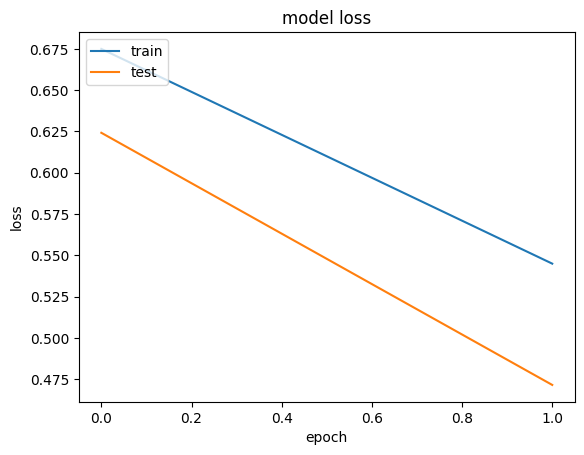

In [48]:
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [50]:
predicted=model.predict(X_test)

38/38 [==============================] - 0s 3ms/step


In [56]:
result=[]
for i in predicted:
    if i>0.5:
        result.append("positive")
    else:
        result.append("negative")
result


['positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',